## 파이썬으로 RNN 구현하기

In [1]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [2]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [3]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.97563736 0.98008923 0.94946015 0.80489274 0.93522263 0.89915881
  0.9617654  0.98435062]
 [0.9998094  0.99996008 0.99993962 0.9999677  0.99993093 0.99974205
  0.99993778 0.99998479]
 [0.99989679 0.99998897 0.99998535 0.99999103 0.99999379 0.9999258
  0.99997639 0.99999559]
 [0.99987136 0.99998656 0.99998602 0.99999057 0.99999197 0.99987949
  0.99997235 0.99999438]
 [0.99984467 0.99998296 0.999968   0.9999774  0.99996718 0.99987352
  0.99997021 0.99999438]
 [0.99972307 0.99993511 0.99994542 0.99998233 0.99997446 0.99986692
  0.99993976 0.99997865]
 [0.99989523 0.99998655 0.99998233 0.9999896  0.99999074 0.99991578
  0.99997458 0.99999471]
 [0.99994096 0.99999495 0.99999197 0.99999128 0.99999162 0.99989193
  0.99998482 0.99999766]
 [0.99985204 0.99997068 0.99997322 0.99998804 0.9999848  0.99988054
  0.99996193 0.99998867]
 [0.99993214 0.99998683 0.99997291 0.99998608 0.99998298 0.9999462
  0.99997875 0.99999531]]


## 파이토치의 nn.RNN()

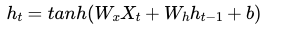

In [4]:
import torch
import torch.nn as nn

device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')

In [5]:
input_size = 5
hidden_size = 8

In [6]:
# batch_size, time_steps, input_size
inputs = torch.Tensor(1, 10, 5)

In [7]:
# batch_first=True -> 입력 텐서의 첫번째 차원이 배치 크기임을 알려줌
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [8]:
outputs, _status = cell(inputs)

10번의 시점동안 8차원의 은닉상태가 출력되었음

In [9]:
outputs.shape

torch.Size([1, 10, 8])

In [10]:
_status.shape

torch.Size([1, 1, 8])

## Deep Recurrent Neural Network

In [11]:
inputs = torch.Tensor(1, 10, 5)

In [12]:
cell = nn.RNN(input_size=5, hidden_size=8, num_layers=2, batch_first=True)

In [13]:
outputs, _status = cell(inputs)

In [14]:
outputs.shape

torch.Size([1, 10, 8])

층의 개수, 배치 크기, 은닉 상태의 크기

In [15]:
_status.shape

torch.Size([2, 1, 8])

## Bidirectional Recurrent Neural Network

In [16]:
inputs = torch.Tensor(1, 10, 5)

In [17]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [18]:
outputs, _status = cell(inputs)

배치 크기, 시퀀스 길이, 은닉 상태의 크기 * 2

In [19]:
outputs.shape

torch.Size([1, 10, 16])

층의 개수 * 2, 배치 크기, 은닉 상태의 크기

In [20]:
_status.shape

torch.Size([4, 1, 8])